In [50]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import shapiro

from eff.analysis import mann_whitney_test, wilcoxon_signed_rank_test, get_significance_level
from eff.analysis.plotting import set_lang_ax
from eff.util.util import load_results

In [51]:
base_path = Path("./out/nelex_unique")
dataset, res, criterion, model = load_results(base_path, 'khk')
fontsize=18

In [52]:
# harmonic groups
front_vowels = ['e', 'u', 'o'] # +ATR
back_vowels = ['a', 'ʊ', 'ɔ'] # -ATR
neutral_vowels = ['i']

In [53]:
# model probe front harmony (feature surprisal)
clts_ds = dataset['clts']
bipa = clts_ds.bipa
output_alphabet = clts_ds.output_alphabet
logprobs = res['unmasked']['logprobs']
targets = res['unmasked']['targets']
target_indices = res['unmasked']['indices']

front_indices = [output_alphabet.char2idx(v) for v in front_vowels]
back_indices = [output_alphabet.char2idx(v) for v in back_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


ff_surprisal = []
fb_surprisal = []
bb_surprisal = []
bf_surprisal = []
nf_surprisal = []
nb_surprisal = []
nn_surprisal = []


fnf_surprisal = []
fnb_surprisal = []
bnb_surprisal = []
bnf_surprisal = []
nnf_surprisal = []
nnb_surprisal = []
nnn_surprisal = []


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong':

                # front
                if v1 in front_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    ff_surprisal.append(harmonic_surprisal)
                    fb_surprisal.append(disharmonic_surprisal)
                # neutral
                if v1 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    neutral_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in neutral_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    neutral_surprisal = -np.log2(neutral_surprisal)
                    nf_surprisal.append(harmonic_surprisal)
                    nb_surprisal.append(disharmonic_surprisal)
                    nn_surprisal.append(neutral_surprisal)
                # back
                elif v2 in back_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bb_surprisal.append(harmonic_surprisal)
                    bf_surprisal.append(disharmonic_surprisal)

    if len(vowel_indices) >= 3:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2, i3 = vowel_indices[i-2], vowel_indices[i-1], vowel_indices[i]
            v1, v2, v3 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2), output_alphabet.idx2char(i3)
            target_idx = indices_word[i]

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong' \
            and not clts_ds.bipa[v3].type == 'diphthong':
            
                if v1 in front_vowels and v2 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    fnf_surprisal.append(harmonic_surprisal)
                    fnb_surprisal.append(disharmonic_surprisal)

                elif v1 in back_vowels and v2 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    bnb_surprisal.append(harmonic_surprisal)
                    bnf_surprisal.append(disharmonic_surprisal)

                elif v1 in neutral_vowels and v2 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in front_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in back_indices])
                    neutral_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in neutral_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    neutral_surprisal = -np.log2(neutral_surprisal)
                    nnf_surprisal.append(harmonic_surprisal)
                    nnb_surprisal.append(disharmonic_surprisal)
                    nnn_surprisal.append(neutral_surprisal)

                
n_ff = len(ff_surprisal)
n_fb = len(fb_surprisal)
n_bb = len(bb_surprisal)
n_bf = len(bf_surprisal)
n_nf = len(nf_surprisal)
n_nb = len(nb_surprisal)
n_nn = len(nn_surprisal)

n_fnf = len(fnf_surprisal)
n_fnb = len(fnb_surprisal)
n_bnb = len(bnb_surprisal)
n_bnf = len(bnf_surprisal)
n_nnf = len(nnf_surprisal)
n_nnb = len(nnb_surprisal)
n_nnn = len(nnn_surprisal)

front_harmonic_surprisal = ff_surprisal + bb_surprisal
front_disharmonic_surprisal = fb_surprisal + bf_surprisal

delta_mean_f = np.mean(ff_surprisal) - np.mean(fb_surprisal)
delta_mean_b = np.mean(bb_surprisal) - np.mean(bf_surprisal)
delta_mean_n = np.mean(nf_surprisal) - np.mean(nb_surprisal)
delta_mean_disharmonic2 = np.mean(fb_surprisal) - np.mean(bf_surprisal)
print(delta_mean_f)
print(delta_mean_b)
print(delta_mean_disharmonic2)

delta_mean_fn = np.mean(fnf_surprisal) - np.mean(fnb_surprisal)
print(delta_mean_fn)
delta_mean_bn = np.mean(bnb_surprisal) - np.mean(bnf_surprisal)
print(delta_mean_bn)
delta_mean_nn = np.mean(nnf_surprisal) - np.mean(nnb_surprisal)
print(len(nnf_surprisal)) # no items
print(len(nnb_surprisal)) # no items
print(delta_mean_nn) # NAN
delta_mean_disharmonic3 = np.mean(fnb_surprisal) - np.mean(bnf_surprisal)

-1.8211014946613266
-0.6621043287509549
0.39954589932025497
-1.5546514936520412
-0.4695121691863009
0
0
nan


In [54]:
print(shapiro(front_harmonic_surprisal))
print(shapiro(front_disharmonic_surprisal))

print(shapiro(ff_surprisal))
print(shapiro(fb_surprisal))
print(shapiro(bb_surprisal))
print(shapiro(bf_surprisal))

ShapiroResult(statistic=0.9433196187019348, pvalue=1.3127923637057393e-07)
ShapiroResult(statistic=0.9666067957878113, pvalue=4.3403077143011615e-05)
ShapiroResult(statistic=0.5844917297363281, pvalue=3.0201118298919805e-13)
ShapiroResult(statistic=0.9569814801216125, pvalue=0.012273009866476059)
ShapiroResult(statistic=0.9453513026237488, pvalue=1.66221634572139e-05)
ShapiroResult(statistic=0.9209824800491333, pvalue=3.096469072261243e-07)


In [55]:
# harmonic vs. disharmonic 
res = mann_whitney_test(front_harmonic_surprisal, front_disharmonic_surprisal)
print(res)

res = mann_whitney_test(fnf_surprisal+bnb_surprisal, fnb_surprisal+bnf_surprisal)
print(res)

print(np.mean(nf_surprisal+nb_surprisal) - np.mean(nn_surprisal))
res = mann_whitney_test(nf_surprisal+nb_surprisal, nn_surprisal)
print(res)

# print(np.mean(nnf_surprisal+nnb_surprisal) - np.mean(nnn_surprisal))
# res = mann_whitney_test(nnf_surprisal+nnb_surprisal, nnn_surprisal)
# print(res)

(8123.0, 2.4663643166699168e-34, -0.670359548737927)
(45.0, 0.005452139856940547, -0.6000000000000001)
-1.5183054139489984
(142.0, 4.203491308278433e-09, -0.8052126200274348)


In [56]:
# 2 vowels
U, p_value_f, r = wilcoxon_signed_rank_test(ff_surprisal, fb_surprisal)
print("atr\_atr/atr\_natr & {} &  {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_f, 4), U, p_value_f, round(r, 4)))
U, p_value_b, r = wilcoxon_signed_rank_test(bb_surprisal, bf_surprisal)
print("natr\_natr/natr\_atr & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_b, 4), U, p_value_b, round(r, 4)))
U, p_value_n, r = wilcoxon_signed_rank_test(nf_surprisal, nb_surprisal)
print("n\_atr/n\_natr & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_n, 4), U, p_value_n, round(r, 4)))
U, p_value, r = mann_whitney_test(fb_surprisal, bf_surprisal)
print("atr\_natr/natr\_atr & {} & {} & {} & {} & Mann-Whitney \\\\"
    .format(round(delta_mean_disharmonic2, 4), U, p_value, round(r, 4)))

atr\_atr/atr\_natr & -1.8211 &  27.0 & 1.552827464773496e-13 & 0.0095 & Wilcoxon \\
natr\_natr/natr\_atr & -0.6621 & 1819.0 & 2.5547912616031906e-12 & 0.1672 & Wilcoxon \\
n\_atr/n\_natr & -0.6531 & 91.0 & 0.018545904872989787 & 0.2407 & Wilcoxon \\
atr\_natr/natr\_atr & 0.3995 & 7395.0 & 3.2120647003889135e-05 & 0.3415 & Mann-Whitney \\


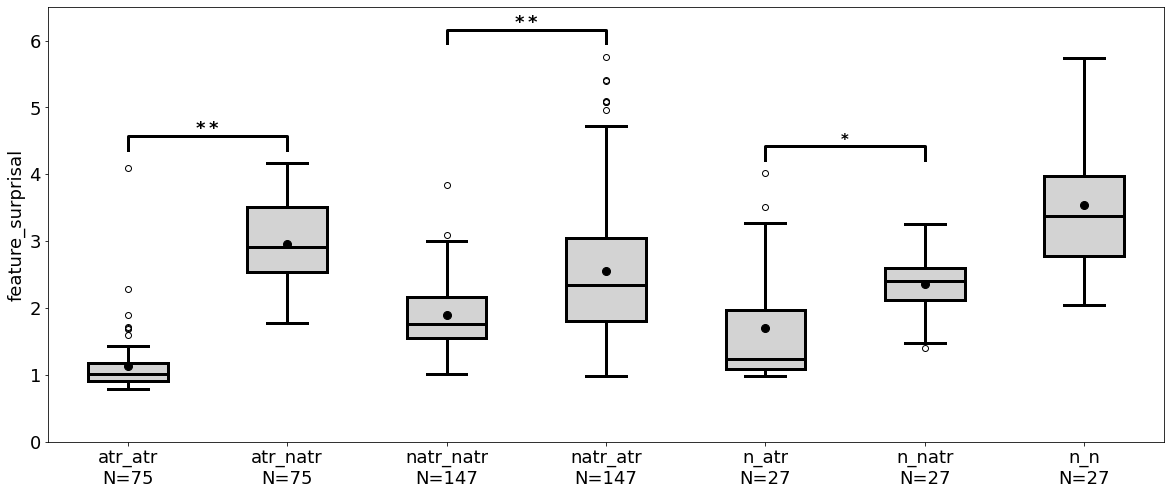

In [57]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

ax.set_ylim([0,6.5])

data = [
    ff_surprisal, 
    fb_surprisal, 
    bb_surprisal, 
    bf_surprisal,
    nf_surprisal, 
    nb_surprisal,
    nn_surprisal
]

xlabels = [
    "atr_atr\nN={}".format(n_ff),
    "atr_natr\nN={}".format(n_fb),
    "natr_natr\nN={}".format(n_bb),
    "natr_atr\nN={}".format(n_bf),
    "n_atr\nN={}".format(n_nf),
    "n_natr\nN={}".format(n_nb),
    "n_n\nN={}".format(n_nn)
]

set_lang_ax(ax, data, xlabels, 
    # title='Finnish',
    title=None,
    boxcolor='lightgrey',
    fontsize=fontsize,
    ylabel="feature_surprisal"
)

# significance front harmony violation
level = get_significance_level(p_value_f)
x1, x2 = 1, 2
y, h, col = max(fb_surprisal + ff_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance back harmony violation
level = get_significance_level(p_value_b)
x1, x2 = 3, 4
y, h, col = max(bb_surprisal + bf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance neutral harmonic/disharmonic violation
level = get_significance_level(p_value_n)
x1, x2 = 5, 6
y, h, col = max(nf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

# plt.savefig("../img/surprisal_front_neutral_harmony_fin.png",
plt.savefig("../img/surprisal_front2_harmony_khk.png",
        bbox_inches='tight',
        pad_inches=0,
        format='png',
        dpi=300)

In [58]:
# 3 vowels
U, p_value_fn, r = wilcoxon_signed_rank_test(fnf_surprisal, fnb_surprisal)
print("f\_n\_f/f\_n\_b & {} &  {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_fn, 4), U, p_value_fn, round(r, 4)))
U, p_value_bn, r = wilcoxon_signed_rank_test(bnb_surprisal, bnf_surprisal)
print("b\_n\_b/b\_n\_f & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_bn, 4), U, p_value_bn, round(r, 4)))
# U, p_value_nn, r = wilcoxon_signed_rank_test(nnf_surprisal, nnb_surprisal)
# print("n\_n\_f/n\_n\_b & {} & {} & {} & {} \\\\"
#     .format(round(delta_mean_nn, 4), U, p_value_nn, round(r, 4)))
# U, p_value, r = mann_whitney_test(fnb_surprisal, bnf_surprisal)
print("f\_n\_b/b\_n\_f & {} & {} & {} & {} \\\\"
    .format(round(delta_mean_disharmonic3, 4), U, p_value, round(r, 4)))

f\_n\_f/f\_n\_b & -1.5547 &  0.0 & 0.125 & 0.0 & Wilcoxon \\
b\_n\_b/b\_n\_f & -0.4695 & 20.0 & 0.2783203125 & 0.303 & Wilcoxon \\
f\_n\_b/b\_n\_f & 0.1846 & 20.0 & 3.2120647003889135e-05 & 0.303 \\


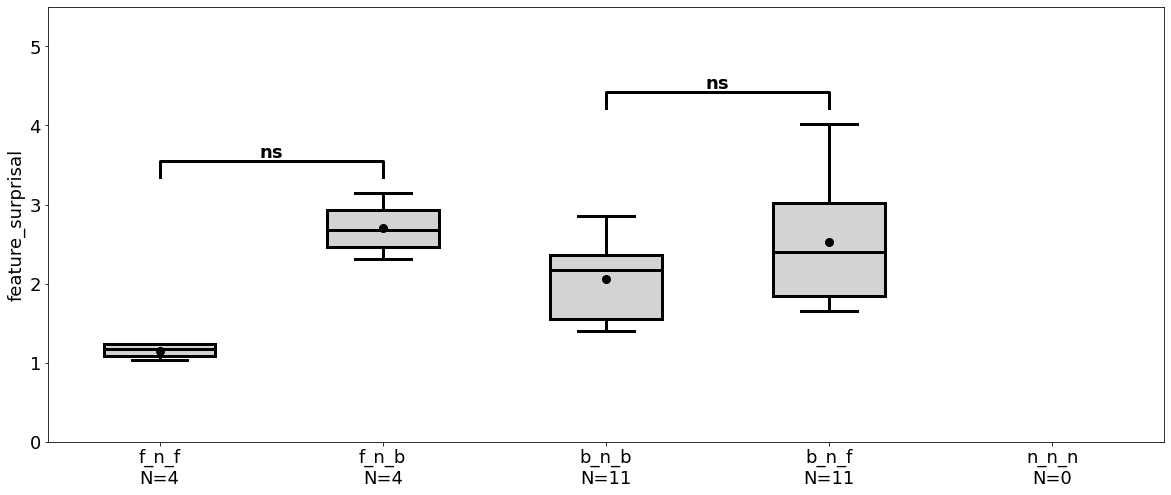

In [59]:
# (too few instances)
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

ax.set_ylim([0,5.5])

data = [
    fnf_surprisal, 
    fnb_surprisal, 
    bnb_surprisal, 
    bnf_surprisal,
    # nnf_surprisal, 
    # nnb_surprisal,
    nnn_surprisal
]

xlabels = [
    "f_n_f\nN={}".format(n_fnf),
    "f_n_b\nN={}".format(n_fnb),
    "b_n_b\nN={}".format(n_bnb),
    "b_n_f\nN={}".format(n_bnf),
    # "n_n_f\nN={}".format(n_nnf),
    # "n_n_b\nN={}".format(n_nnb),
    "n_n_n\nN={}".format(n_nnn)
]

set_lang_ax(ax, data, xlabels, 
    # title='Finnish',
    title=None,
    ylabel=r"feature_surprisal",
    boxcolor='lightgrey',
    fontsize=18
)

# significance front harmony violation
level = get_significance_level(p_value_fn)
x1, x2 = 1, 2
y, h, col = max(fnb_surprisal + fnf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance back harmony violation
level = get_significance_level(p_value_bn)
x1, x2 = 3, 4
y, h, col = max(bnb_surprisal + bnf_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=18)

# significance neutral harmonic/disharmonic violation
# level = get_significance_level(p_value_nn)
# x1, x2 = 5, 6
# y, h, col = max(nnf_surprisal + nnb_surprisal) + 0.2, 0.2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
# plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

# plt.savefig("../img/surprisal_front_neutral_harmony_fin.png",
plt.savefig("../img/surprisal_front3_harmony_khk.png",
        bbox_inches='tight',
        pad_inches=0,
        format='png',
        dpi=300)

In [60]:
unrounded_vowels = ['e', 'a', 'i']
rounded_vowels = ['o', 'ɔ']
neutral_vowels = ['u', 'ʊ', 'ɵ']

# rounded_vowels = rounded_vowels + neutral_vowels

# rounded_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'rounded' in bipa[v].featureset] 
# unrounded_vowels = [v for v in output_alphabet.symbols if bipa[v].type == 'vowel' and 'unrounded' in bipa[v].featureset] 

print(rounded_vowels)
print(unrounded_vowels)

['o', 'ɔ']
['e', 'a', 'i']


In [61]:
# model probe rounded harmony (feature surprisal)

rounded_indices = [output_alphabet.char2idx(v) for v in front_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in back_vowels]

rr_surprisal = []
uu_surprisal = []
ur_surprisal = []
ru_surprisal = []
nr_surprisal = []
nu_surprisal = []

rounded_indices = [output_alphabet.char2idx(v) for v in rounded_vowels]
unrounded_indices = [output_alphabet.char2idx(v) for v in unrounded_vowels]
neutral_indices = [output_alphabet.char2idx(v) for v in neutral_vowels]


for indices_word, targets_word, logprobs_word in zip(target_indices, targets, logprobs):
    vowel_indices = [targets_word[idx] for idx in indices_word]
    if len(vowel_indices) >= 2:
        for i in range(len(vowel_indices)-1, 0, -1):
            i1, i2 = vowel_indices[i-1], vowel_indices[i]
            target_idx = indices_word[i] # first index of the logprobs
            # need char to determine harmonic group
            v1, v2 = output_alphabet.idx2char(i1), output_alphabet.idx2char(i2)

            if not clts_ds.bipa[v1].type == 'diphthong' \
            and not clts_ds.bipa[v2].type == 'diphthong' \
            and v1 in back_vowels and v2 in back_vowels: # +atr harmony needs to apply for +-round harmony to operate 

                # round
                if v1 in rounded_vowels :
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices + neutral_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    rr_surprisal.append(harmonic_surprisal)
                    ru_surprisal.append(disharmonic_surprisal)
                # neutral
                if v1 in neutral_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices + neutral_indices])
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    nr_surprisal.append(harmonic_surprisal)
                    nu_surprisal.append(disharmonic_surprisal)
                elif v1 in unrounded_vowels:
                    target_logprobs = logprobs_word[target_idx]
                    harmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in unrounded_indices])
                    # also look for neutral indices since they _do_ belong to the +ROUND group
                    disharmonic_surprisal = sum([2**(-l) for i, l in enumerate(target_logprobs) if i in rounded_indices])
                    harmonic_surprisal = -np.log2(harmonic_surprisal)
                    disharmonic_surprisal = -np.log2(disharmonic_surprisal)
                    uu_surprisal.append(harmonic_surprisal)
                    ur_surprisal.append(disharmonic_surprisal)


n_rr = len(rr_surprisal)
n_ru = len(ru_surprisal)
n_uu = len(uu_surprisal)
n_ur = len(ur_surprisal)
n_nr = len(nr_surprisal)
n_nu = len(nu_surprisal)

print(n_nr)
print(n_nu)

rounded_harmonic_surprisal = rr_surprisal + uu_surprisal
rounded_disharmonic_surprisal = ru_surprisal + ur_surprisal

delta_mean_r = np.mean(rr_surprisal) - np.mean(ru_surprisal)
delta_mean_u = np.mean(uu_surprisal) - np.mean(ur_surprisal)
delta_mean_disharmonic2 = np.mean(ru_surprisal) - np.mean(ur_surprisal)
print(delta_mean_r)
print(delta_mean_u)
print(delta_mean_disharmonic2)

44
44
-0.8522939153444691
-2.0960989725472436
-1.5526201651388933


In [62]:
print(shapiro(rounded_harmonic_surprisal))
print(shapiro(rounded_disharmonic_surprisal))

print(shapiro(rr_surprisal))
print(shapiro(ru_surprisal))
print(shapiro(uu_surprisal))
print(shapiro(ru_surprisal))

ShapiroResult(statistic=0.8144214749336243, pvalue=5.373838041222712e-10)
ShapiroResult(statistic=0.9619420766830444, pvalue=0.004949147813022137)
ShapiroResult(statistic=0.8716369271278381, pvalue=0.0008866410353220999)
ShapiroResult(statistic=0.9017308950424194, pvalue=0.005097974091768265)
ShapiroResult(statistic=0.7752880454063416, pvalue=7.922324130049674e-09)
ShapiroResult(statistic=0.9017308950424194, pvalue=0.005097974091768265)


In [63]:
# harmonic vs. disharmonic 
res = mann_whitney_test(rounded_harmonic_surprisal, rounded_disharmonic_surprisal)
print(res)

# res = mann_whitney_test(fnf_surprisal+bnb_surprisal, fnb_surprisal+bnf_surprisal)
# print(res)

# print(np.mean(nr_surprisal+nu_surprisal) - np.mean(nn_surprisal))
# res = mann_whitney_test(nr_surprisal+nu_surprisal, nn_surprisal)
# print(res)

# print(np.mean(nnf_surprisal+nnb_surprisal) - np.mean(nnn_surprisal))
# res = mann_whitney_test(nnf_surprisal+nnb_surprisal, nnn_surprisal)
# print(res)

(881.0, 1.2053353644990134e-24, -0.8306420607458669)


In [64]:
# significance tests +-ROUND harmony, 2 vowels
U, p_value_r, r = wilcoxon_signed_rank_test(rr_surprisal, ru_surprisal)
print("r\_r/r\_u & {} &  {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_f, 4), U, p_value_r, round(r, 4)))
U, p_value_u, r = wilcoxon_signed_rank_test(uu_surprisal, ur_surprisal)
print("u\_u/u\_r & {} & {} & {} & {} & Wilcoxon \\\\"
    .format(round(delta_mean_b, 4), U, p_value_u, round(r, 4)))
# U, p_value_n, r = wilcoxon_signed_rank_test(nr_surprisal, nu_surprisal)
# print("n\_r/n\_u & {} & {} & {} & {} & Wilcoxon \\\\"
#     .format(round(delta_mean_n, 4), U, p_value_n, round(r, 4)))
U, p_value, r = mann_whitney_test(ru_surprisal, ur_surprisal)
print("r\_u/u\_r & {} & {} & {} & {} & Mann-Whitney \\\\"
    .format(round(delta_mean_disharmonic2, 4), U, p_value, round(r, 4)))

r\_r/r\_u & -1.8211 &  2.0 & 4.369501675470097e-07 & 0.0034 & Wilcoxon \\
u\_u/u\_r & -0.6621 & 2.0 & 8.350593870721494e-13 & 0.0009 & Wilcoxon \\
r\_u/u\_r & -1.5526 & 170.0 & 2.636813545561882e-12 & -0.8529 & Mann-Whitney \\


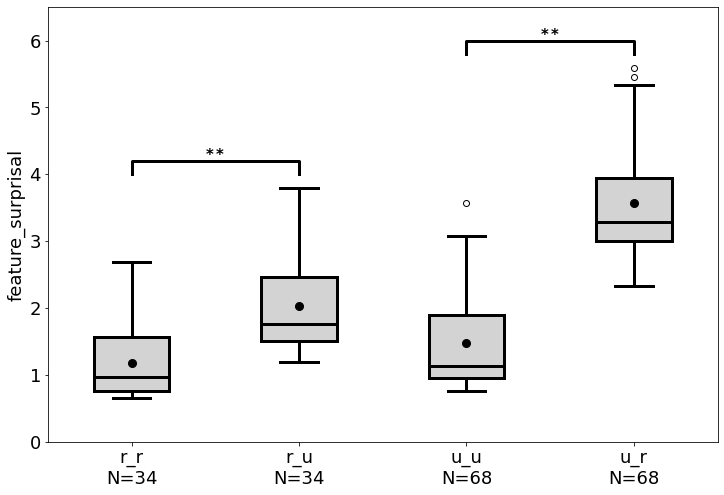

In [66]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

ax.set_ylim([0,6.5])

data = [
    rr_surprisal,
    ru_surprisal, 
    uu_surprisal,
    ur_surprisal
    # nr_surprisal,
    # nu_surprisal
]
xlabels = [
    "r_r\nN={}".format(n_rr),
    "r_u\nN={}".format(n_ru),
    "u_u\nN={}".format(n_uu),
    "u_r\nN={}".format(n_ur)
    # "n_r\nN={}".format(n_nr),
    # "n_u\nN={}".format(n_nu)
]

set_lang_ax(ax, data, xlabels, 
    # title='Turkish',
    title=None,
    boxcolor='lightgrey',
    fontsize=fontsize,
    ylabel="feature_surprisal"
)

# significance rounded/unrounded violation
level = get_significance_level(p_value_r)
x1, x2 = 1, 2
y, h, col = max(ru_surprisal + rr_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

# significance rounded/unrounded violation
level = get_significance_level(p_value_u)
x1, x2 = 3, 4
y, h, col = max(uu_surprisal + ur_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

# level = get_significance_level(p_value_n)
# x1, x2 = 5, 6
# y, h, col = max(uu_surprisal + ur_surprisal) + 0.2, 0.2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, c=col)
# plt.text((x1+x2)*.5, y+h, level, ha='center', va='bottom', color=col, fontsize=15)

plt.savefig("../img/surprisal_rounded2_harmony_khk.png",
# plt.savefig("../img/surprisal_rounded_harmony_khk.png",
            bbox_inches='tight',
            pad_inches=0,
            format='png',
            dpi=300)

In [ ]:
# significance tests +-BACK vs +-ROUND harmony
delta_mean_front = np.mean(front_harmonic_surprisal) - np.mean(front_disharmonic_surprisal)
delta_mean_rounded = np.mean(rounded_harmonic_surprisal) - np.mean(rounded_disharmonic_surprisal)
delta_mean_disharmonic = np.mean(front_disharmonic_surprisal) - np.mean(rounded_disharmonic_surprisal)
U, p_value, r = wilcoxon_signed_rank_test(front_harmonic_surprisal, front_disharmonic_surprisal)
print("atr\_h/dish & {} &  {} & {} & {} & Wilcoxon \\\\".format(round(delta_mean_front, 4), U, p_value, round(r, 4)))
U, p_value, r = wilcoxon_signed_rank_test(rounded_harmonic_surprisal, rounded_disharmonic_surprisal)
print("r\_h/dis & {} & {} & {} & {} & Wilcoxon \\\\".format(round(delta_mean_rounded, 4), U, p_value, round(r, 4)))
U, p_value, r = mann_whitney_test(front_disharmonic_surprisal, rounded_disharmonic_surprisal)
print("atr/r\_dish & {} & {} & {} & {} & Mann-Whitney \\\\".format(round(delta_mean_disharmonic, 4), U, p_value, round(r, 4)))

atr\_h/dish & -1.0537 &  2337.5 & 1.0875297629840122e-25 & 0.0944 & Wilcoxon \\
r\_h/dis & -1.6815 & 6.0 & 2.1768751341009773e-18 & 0.0011 & Wilcoxon \\
atr/r\_dish & -0.3697 & 8941.0 & 0.0023675180205198734 & -0.2103 & Mann-Whitney \\


In [ ]:
fontsize=18

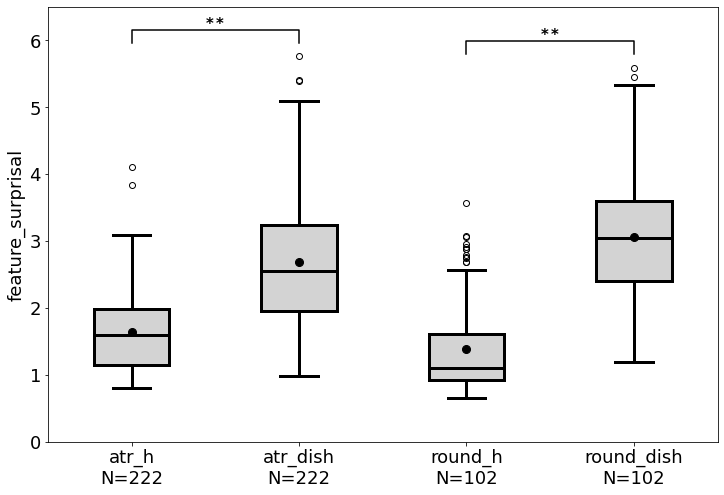

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1, 1, hspace=0.15, wspace=0.25)
ax = gs.subplots()

ax.set_ylim([0,6.5])

data = [
    front_harmonic_surprisal,
    front_disharmonic_surprisal,
    rounded_harmonic_surprisal,
    rounded_disharmonic_surprisal
]
xlabels = [
    "atr_h\nN={}".format(len(front_harmonic_surprisal)),
    "atr_dish\nN={}".format(len(front_disharmonic_surprisal)),
    "round_h\nN={}".format(len(rounded_harmonic_surprisal)),
    "round_dish\nN={}".format(len(rounded_disharmonic_surprisal))
]

set_lang_ax(ax, data, xlabels, 
    title=None,
    boxcolor='lightgrey',
    fontsize=fontsize,
    ylabel="feature_surprisal"
)

# significance front harmonic/disharmonic
x1, x2 = 1, 2
y, h, col = max(front_disharmonic_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$\bf{**}$", ha='center', va='bottom', color=col, fontsize=15)

# significance rounded harmonic/disharmonic
x1, x2 = 3, 4
y, h, col = max(rounded_disharmonic_surprisal) + 0.2, 0.2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, r"$\bf{**}$", ha='center', va='bottom', color=col, fontsize=15)

plt.savefig("../img/surprisal_harmonic_disharmonic2_khk.png",
        bbox_inches='tight',
        pad_inches=0,
        format='png',
        dpi=300)